# Question 1

Write a python function that returns $2\sin(x^2) + \ln(|x|) + 1$ for a given real number $x$.

In [1]:
import math

def fun1(x):
    return 2*(math.sin(x**2))+math.log(abs(x))+1

# Question 2

Write a python function that takes

* A function `f(x)`
* A pair of real numbers `(a,b)`
* An integer `N`

as input and returns the Riemann sum of `f(x)` on the interval `[a,b]` with `N` equal subdivisions.

__Reference: [calculate_integral.py](https://gist.github.com/IlievskiV/a0e8f3e8c45ea9a8e2e6a89a2d78b425) from GitHub.__

In [39]:
def calculate_integral(f, a, b, n):
    w = (b - a)/n
    result = 0.5*f(a) + sum([f(a + i*w) for i in range(1, n)]) + 0.5*f(b)
    result *= w
    return result

# Question 3

* Pull 100 uniformly random numbers from the interval $[0,1]$ as an array `xs`.
* Add 0 at the beginning of the array, and 1.0 at the end.
* Sort the array `xs` from smallest to the largest.
* Calculate its discrete derivative `ys`, i.e. let $y_i = x_{i+1} - x_i$

In [40]:
import numpy as np

xs=np.random.uniform(low=0,high=1,size=100)
xs=np.insert(xs,0,0.0)
xs=np.insert(xs,101,1.0)
xs=np.sort(xs)
ys=np.zeros(101)

for i in np.arange(0,101,1):
    ys[i]=xs[i+1]-xs[i]

# Question 4

* Pull 100 uniformly random numbers from the interval $[0,1]$ into an array `xs`.
* Pull 100 random numbers from the Gaussion distribution with $\mu=0$ and $\sigma=1.0$ into an array `ys`.
* Scatter plot `xs` against `ys` using `matplotlib`


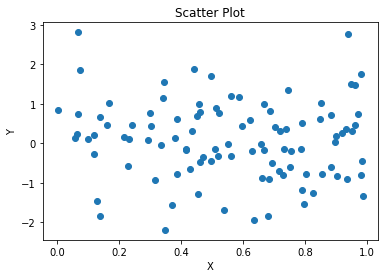

In [110]:
import numpy as np
import matplotlib.pyplot as plt

xs=np.random.uniform(low=0,high=1,size=100)
ys=np.random.normal(loc=0.0,scale=1.0,size=100)
plt.scatter(xs,ys)
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Question 5

Using the `numpy` library

* Pull a random $100\times 100$ matrix
* Calculate its 100-th power
* Calculate its eigen-values
* Calculate is [Singular Value Decomposition](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)

In [67]:
import numpy as np

xs=np.random.rand(100,100)
xs1=np.linalg.matrix_power(xs,100)
xs2=np.linalg.eig(xs)
u,s,vh=np.linalg.svd(xs)

# Question 6

* Pull the text of a novel by Dickens from the website of [Gutenberg Project](https://www.gutenberg.org/)
* Remove all non-alphanumeric characters 
* Split the text into words and convert them into lower case
* Count the number of distinct words in the  text
* Count how many times each word occurs within the text

In [46]:
from urllib.request import urlopen
from collections import Counter
import re

file=urlopen('https://www.gutenberg.org/files/766/766-h/766-h.htm')
file_list=[]

for line in file:
    decoded_line=line.decode('utf-8')
    all_alphabetic_line=re.sub(r'\W+',' ',decoded_line)
    all_lowercase_line=all_alphabetic_line.lower()
    splitted_line=all_lowercase_line.split()
    file_list+=splitted_line
    
counter_list=Counter(file_list)
key_list=list(counter_list.keys())
distinct_words=len(key_list)
value_list=list(counter_list.values())
total_count=sum(counter_list.values())

# Question 7

* Write a python function `CountWords` that takes the URL for a text and returns the number of unique words within the text.
* Write a python function `Top20Words` that takes the URL for a text and returns the most frequently appearing top 20 words within the text.

In [49]:
from urllib.request import urlopen
from collections import Counter
import re

def CountWords(filename):
    file=urlopen(filename)
    file_list=[]
    
    for line in file:
        decoded_line=line.decode('utf-8')
        all_alphabetic_line=re.sub(r'\W+',' ',decoded_line)
        all_lowercase_line=all_alphabetic_line.lower()
        splitted_line=all_lowercase_line.split()
        file_list+=splitted_line
        
    counter_list=Counter(file_list)
    key_list=list(counter_list.keys())
    distinct_words=len(key_list)
    return distinct_words

def Top20Words(filename):
    file=urlopen(filename)
    file_list=[]
    
    for line in file:
        decoded_line=line.decode('utf-8')
        all_alphabetic_line=re.sub(r'\W+',' ',decoded_line)
        all_lowercase_line=all_alphabetic_line.lower()
        splitted_line=all_lowercase_line.split()
        file_list+=splitted_line
        
    counter_list=Counter(file_list).most_common(20)
    return counter_list

# Question 8

* Pull the [IMKB](https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx) data from UCI using pandas.
* Plot the TL based ISE and USD based ISE columns together in the same graph.
* Calculate how many times `NIKKEI` was higher than `FTSE`.

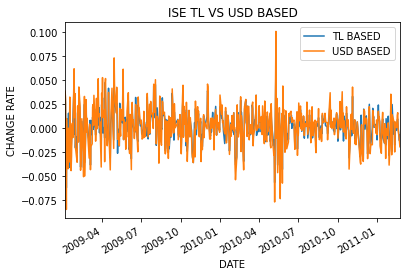

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

financial_data=pd.read_excel(r'/home/mlhsntrk/Downloads/data_akbilgic.xlsx')
financial_data.rename( columns={'Unnamed: 0':'DATE','Unnamed: 5':'FTSE','Unnamed: 6':'NIKKEI'},inplace=True )
financial_data=financial_data[1:]
financial_data.plot('DATE',y=['TL BASED','USD BASED'])
plt.title('ISE TL VS USD BASED')
plt.xlabel('DATE')
plt.ylabel('CHANGE RATE')
plt.show()
comparison_array=np.where(financial_data['NIKKEI']>=financial_data['FTSE'],True,False)
summation_value=np.sum(comparison_array)

# Question 9

Using the [networkx](https://networkx.org/) library

* Get the [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) of the [Peterson graph](https://en.wikipedia.org/wiki/Petersen_graph).
* Calculate its eigen-values and eigen-vectors using the [numpy](https://numpy.org/) library.
* Repeat the same for a [random 3-regular graph on 10 vertices](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.generators.random_graphs.random_regular_graph.html).

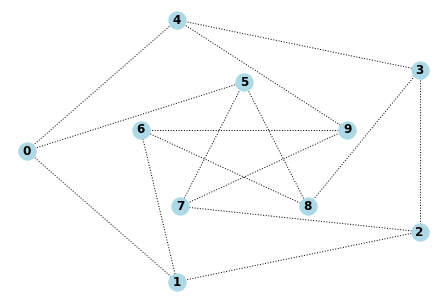

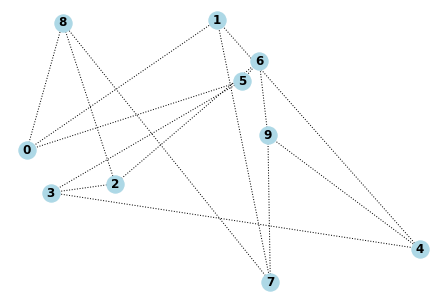

In [105]:
import networkx as nx
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt

graph1=nx.petersen_graph()
nx.draw_shell(graph1,nlist=[range(5,10),range(5)],with_labels=True,font_weight='bold',node_color='lightblue',font_color='black',style='dotted')
plt.show()

adj_matrix1=csr_matrix.todense(nx.linalg.graphmatrix.adjacency_matrix(graph1))
eigen_values1,eigen_vectors1=np.linalg.eig(adj_matrix1)

graph2=nx.generators.random_graphs.random_regular_graph(3,10)
nx.draw_random(graph2,with_labels=True,font_weight='bold',node_color='lightblue',font_color='black',style='dotted')
plt.show()

adj_matrix2=csr_matrix.todense(nx.linalg.graphmatrix.adjacency_matrix(graph2))
eigen_values2,eigen_vectors2=np.linalg.eig(adj_matrix2)